<a href="https://colab.research.google.com/github/Jonguye/Porfolioproject/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB PYTHON PROJECT

---



**In this project, we are going to analyse IMDB data from 2006 to 2016 from the data source in this link:**


https://www.kaggle.com/PromptCloudHQ/imdb-data



In [51]:
import numpy as np                  #For linear algebra
import pandas as pd                 #For working with dataset
import matplotlib
import matplotlib.pyplot as plt     #Visualisation
import seaborn as sns               #Visualisation


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB-Movie-Data.csv')


# 1. Display Top 10 Rows of The Dataset

In [54]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


# 2. Find Shape of Our Dataset (Number of Rows And Number of Columns)





In [5]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])


Number of rows 1000
Number of columns 12


# 3. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB



We can see that our dataset includes both numerical and categorical variables. And there are also missing values in our dataset since the number of non-null values doesn't match the number of entries.


In [11]:
# List of categorical variables
categorical = [i for i in data.columns if data[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in data.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)


categorical: ['Title', 'Genre', 'Description', 'Director', 'Actors'] 
 numerical:  ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']


# 4. Check Missing Values In The Dataset

Let's check how many null values are there in each variable



In [12]:
data[numerical].isnull().sum()


Rank                    0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

As can be seen, ***Revenue (Millions)*** and ***Metascore*** are the ones with the highest number of missing values in numerical segment.

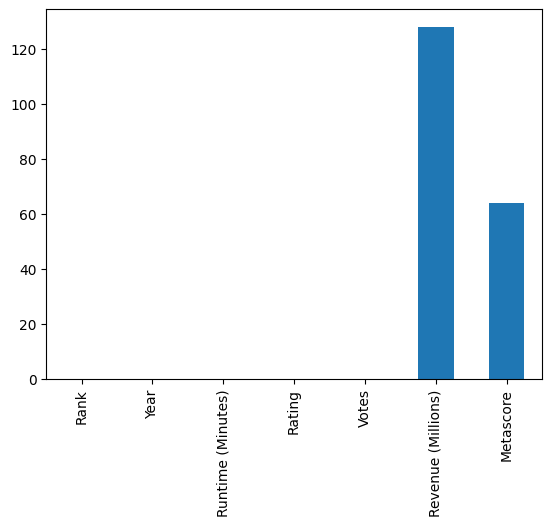

In [13]:
data[numerical].isnull().sum().plot.bar()
plt.show()

In [14]:
round(data[numerical].isnull().sum() / len(data), 3)


Rank                  0.000
Year                  0.000
Runtime (Minutes)     0.000
Rating                0.000
Votes                 0.000
Revenue (Millions)    0.128
Metascore             0.064
dtype: float64

Approximately 12.8% values of ***Revenue (Millions)*** is missing while the rate for, ***Metascore*** is at around 6.4%.

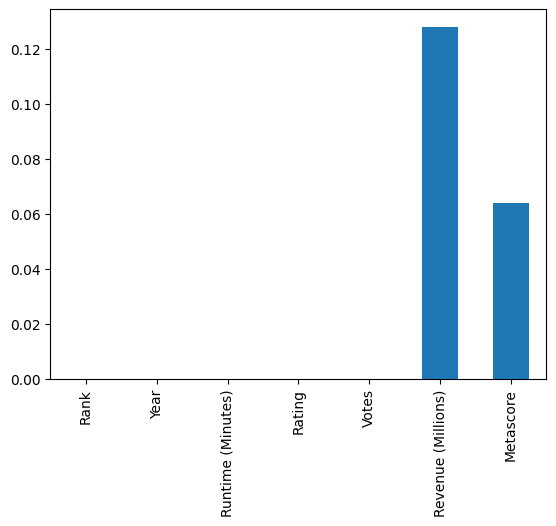

In [15]:
(data[numerical].isnull().sum() / 1000).plot.bar()
plt.show()

Similarly, we calculate and plot the number of missing values in categorical variables



In [16]:
data[categorical].isnull().sum()


Title          0
Genre          0
Description    0
Director       0
Actors         0
dtype: int64

**There is no missing values**

# 5. Let's inspect the distribution of numerical variables.


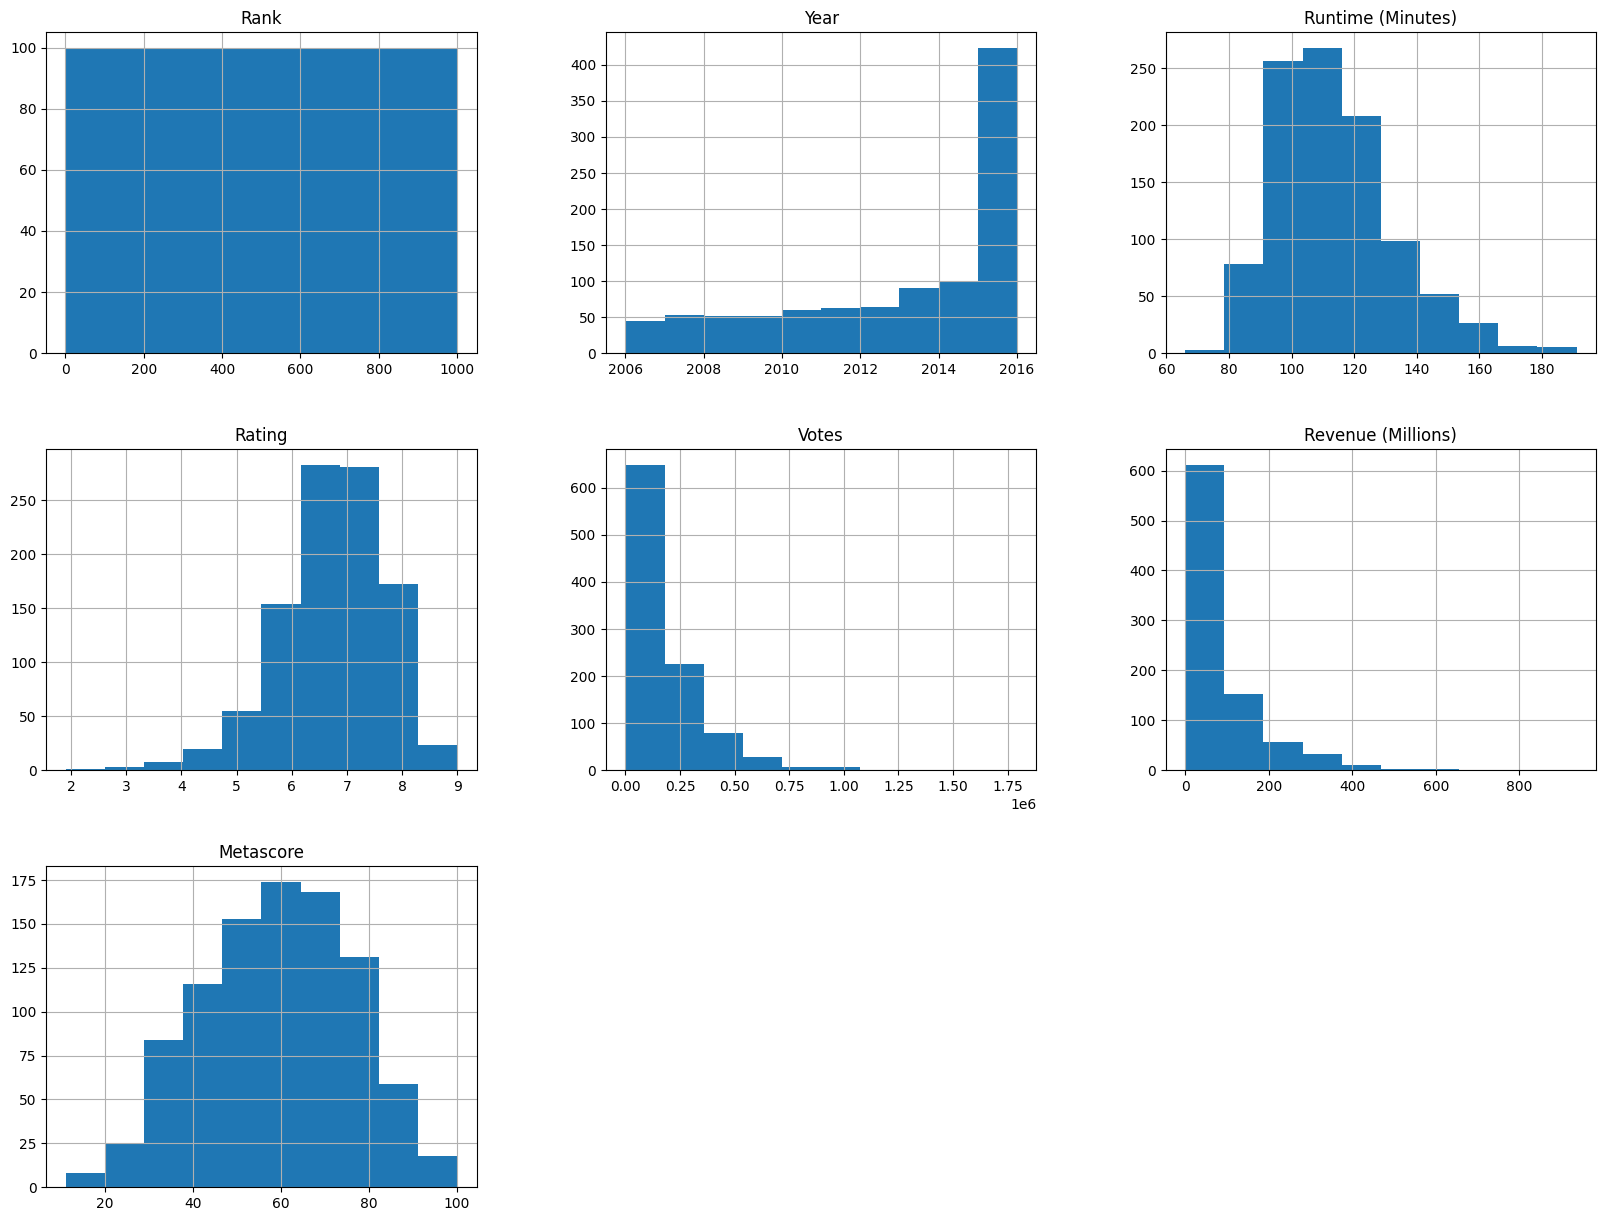

In [17]:
data[numerical].hist(bins=10, figsize = (20,15))
plt.show()

The histograms show us that only ***Metascore*** follow normal distribution while ***Year***, ***Vote*** and ***Revenue (Millions)*** are highly skewed. ***Rank*** is our outlier because it is a unique key which is from 1-1000 so it doesnt follow normal distribution

Some descriptive statistics about categorical variables

In [18]:
data[categorical].describe()


,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


From the summary table, we can see the most frequent values of each variable and its frequency in the dataset.

# 6. Overall Statistics about the DataFrame

In [13]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Let's draw boxplots to inspect the range of the data and anomalies.



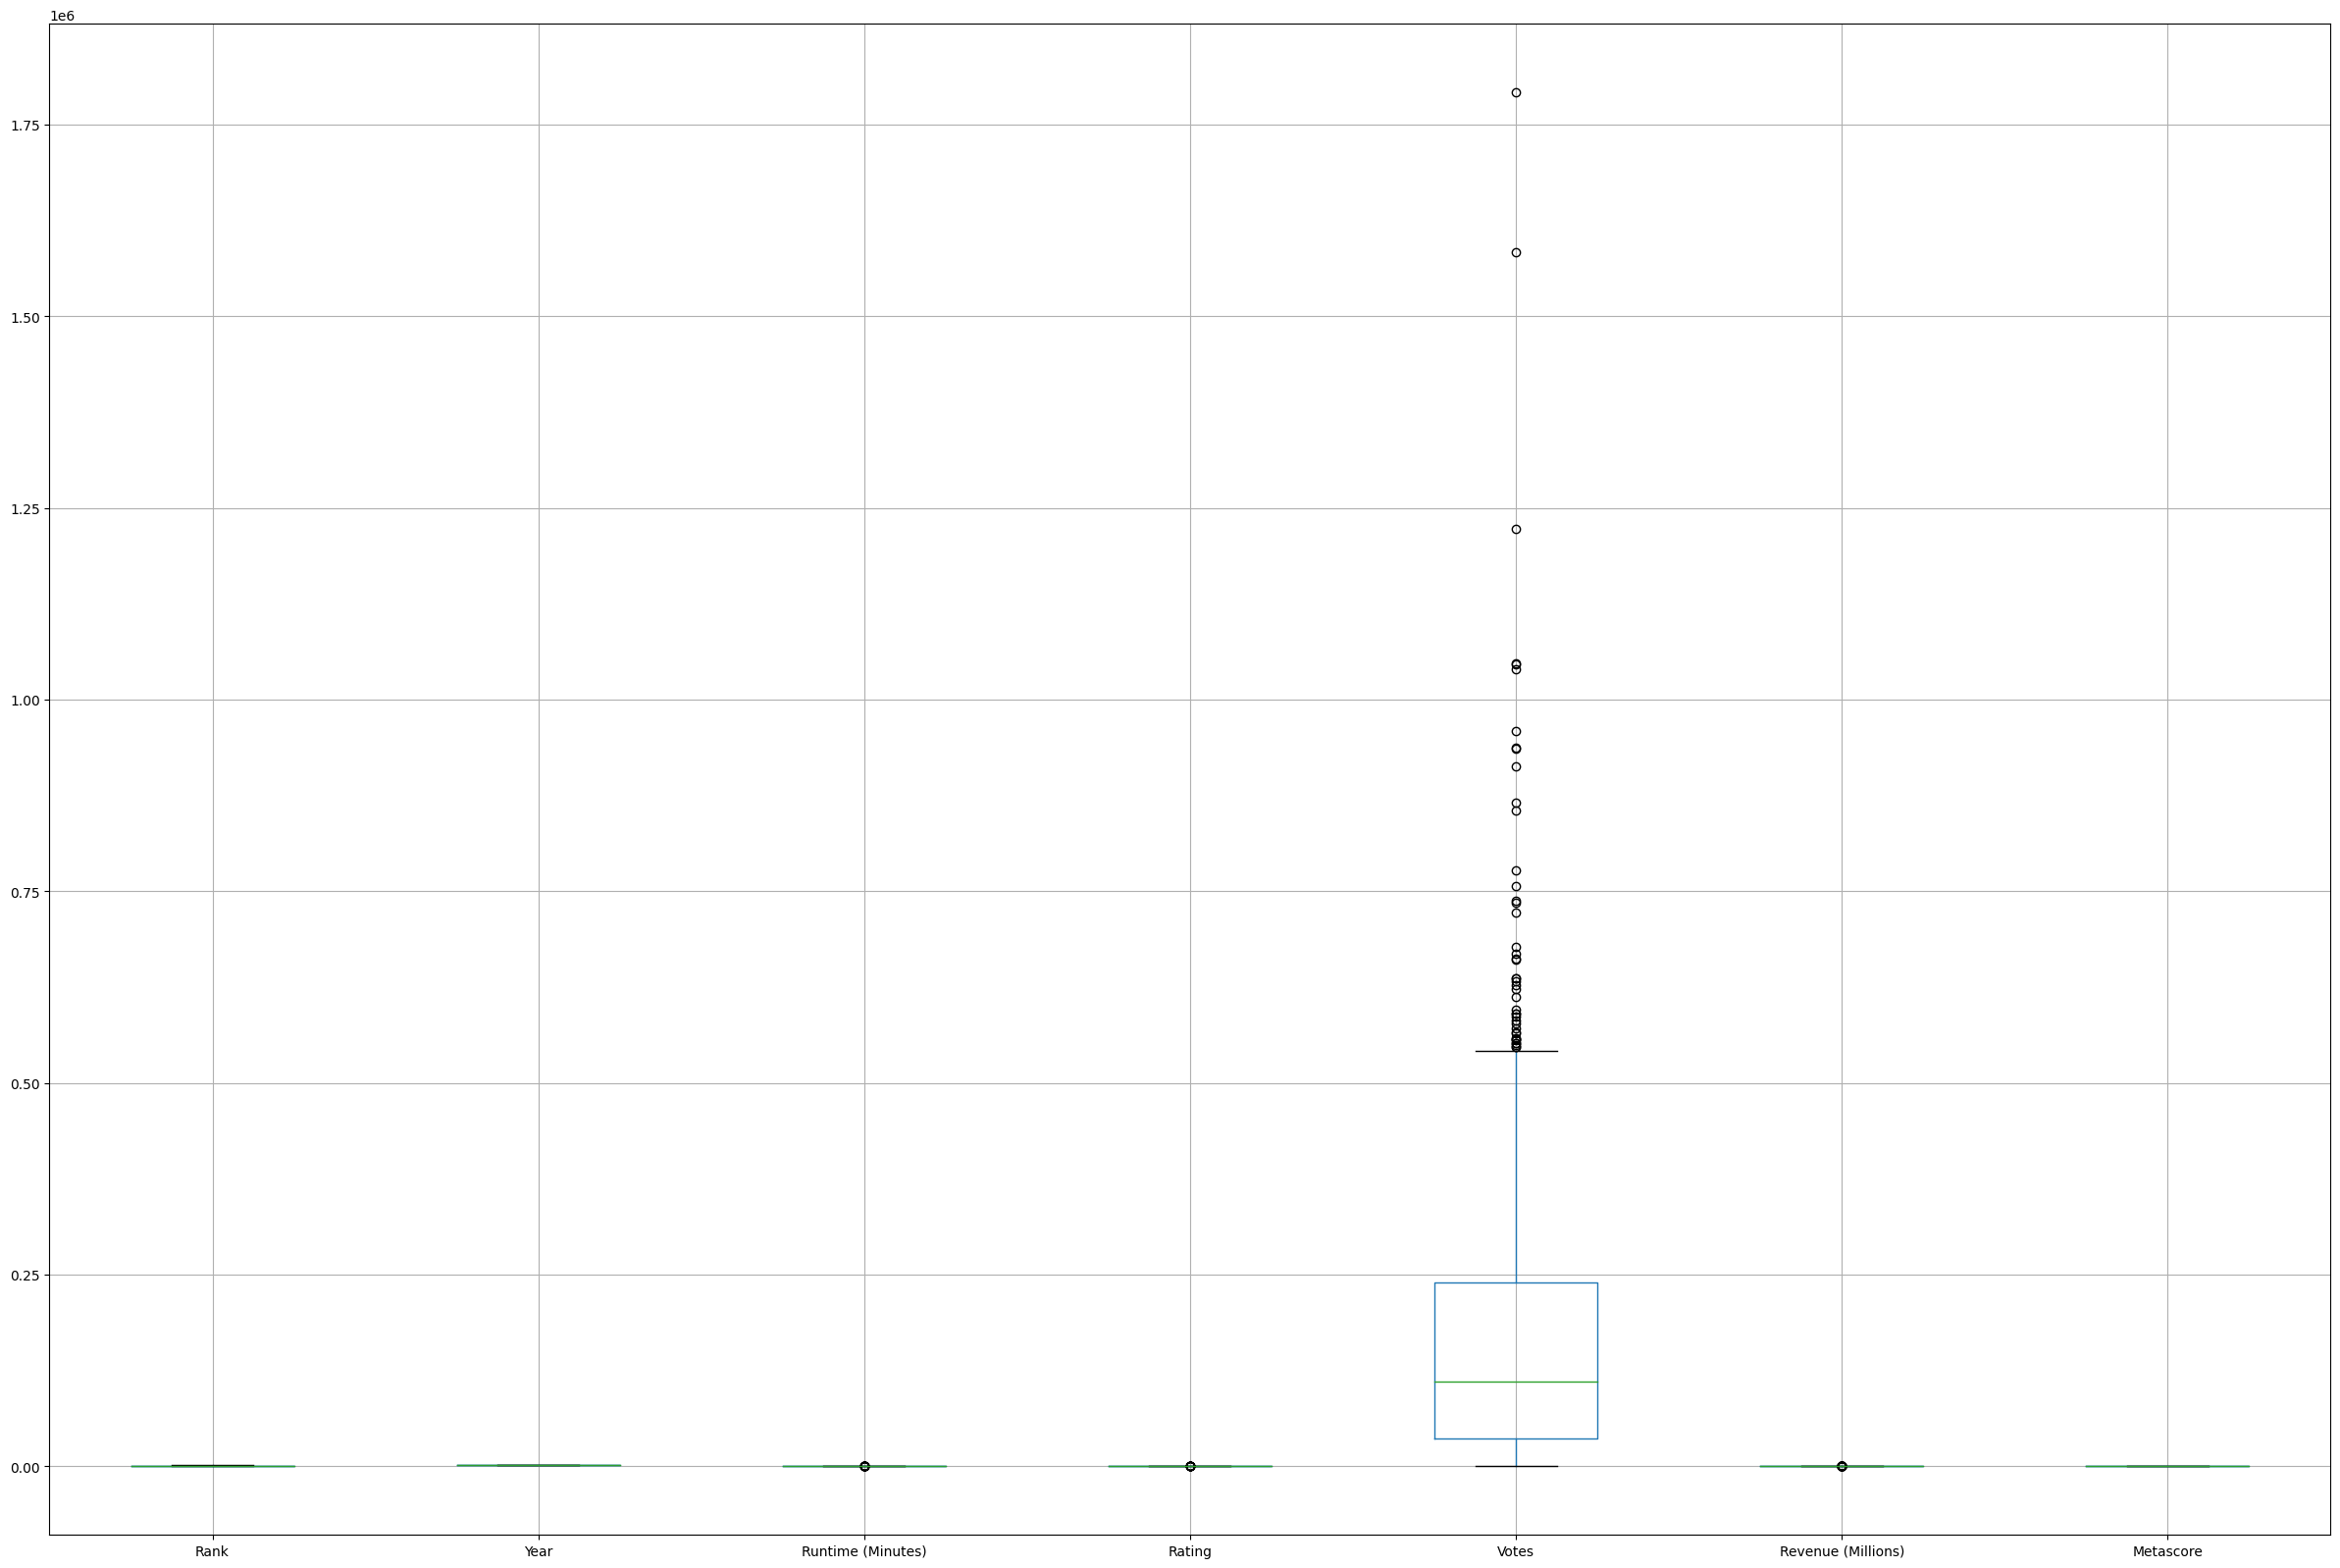

In [21]:
data[numerical].boxplot(figsize=(30,20))
plt.show()



The boxplots reveals that Votes is the only outliers in the data set.

In [40]:
outlier=['Votes']

Let's draw a heatmap to see the correlation between variables



<ipython-input-55-12c5542ade4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')


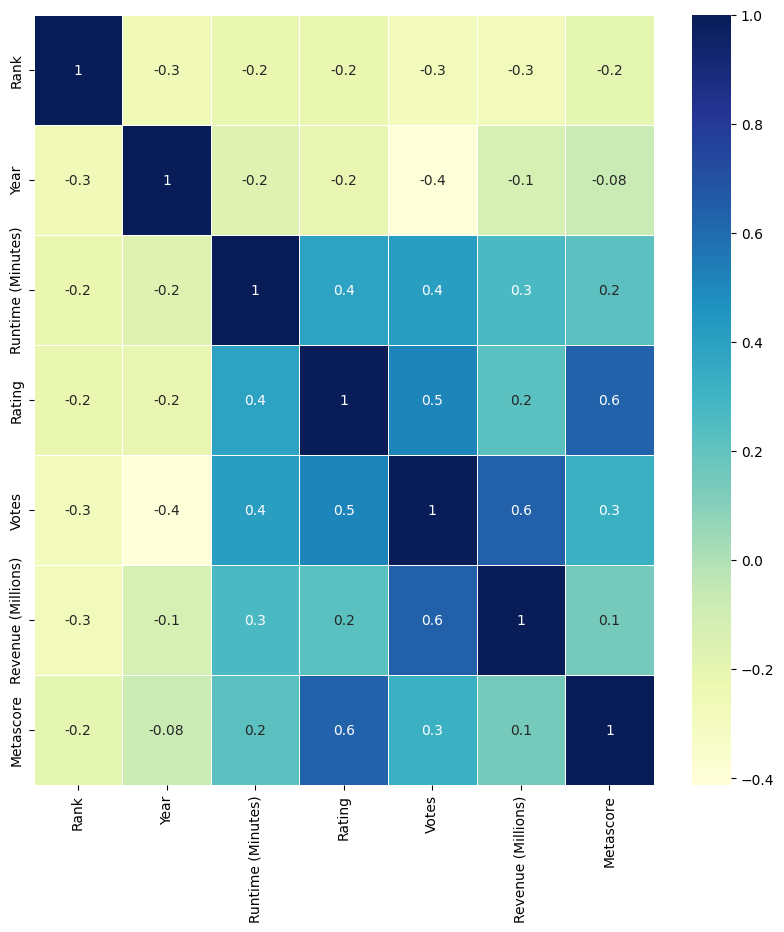

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(data.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')


From this heatmap, we can see blocks of highly correlated variables along the main diagonal. The darker colour of the blocks, the higher the correlation is. In this map, we can see that ***Rating*** has a high positive correlation with ***Metascore*** and ***Votes***. ***Votes*** has a high positive correlation with ***Revenue (Millions)***.

**DATA PREPARATION**

---



In this part, we will prepare the data to better expose the underlying data patterns.

***Data cleaning***





In the data cleaning task, we will come to remove outliers and deal with missing values.

In this case, we will remove the outliers that initially detected in the boxplots. To determine whether a datapoint is outlier or not, we will calculate the ***interquartile*** method.

An interquartile will be calculated by the formula: ***IQR = Q3 - Q1***

In [41]:
IQR_o = data[outlier].quantile(0.75) - data[outlier].quantile(0.25)
print(IQR_o)

Votes    203600.75
dtype: float64


We then iterately compute the upper bound and lower bound of ***Votes***



In [47]:
upb_vote = round(data['Votes'].quantile(0.25) - 1.5*IQR_o[0], 3)
lob_vote = round(data['Votes'].quantile(0.75) + 1.5*IQR_o[0], 3)
print('Upper bound is:', upb_vote)
print('Lower bound is:', lob_vote)

Upper bound is: nan
Lower bound is: nan


The outliers in ***Votes*** will be values that are *>545310.875*

Lets get rid of these values

In [56]:
data = data[~((data ['Votes'] > 545310.875))]
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,955.000000,955.000000,955.000000,955.000000,955.000000,827.000000,893.000000
mean,513.751832,2012.881675,112.314136,6.664503,142667.029319,72.583531,58.272116
std,286.251129,3.193880,18.217408,0.921003,132727.940331,86.046285,17.103184
min,2.000000,2006.000000,66.000000,1.900000,61.000000,0.000000,11.000000
25%,271.500000,2010.500000,99.000000,6.100000,34147.000000,11.255000,46.000000
50%,520.000000,2014.000000,110.000000,6.700000,102547.000000,44.670000,59.000000
75%,761.500000,2016.000000,123.000000,7.300000,214909.500000,100.015000,71.000000
max,1000.000000,2016.000000,191.000000,8.800000,542362.000000,652.180000,100.000000



> Now that the statitics have changed, let's see if we finally get rid of the outliers.

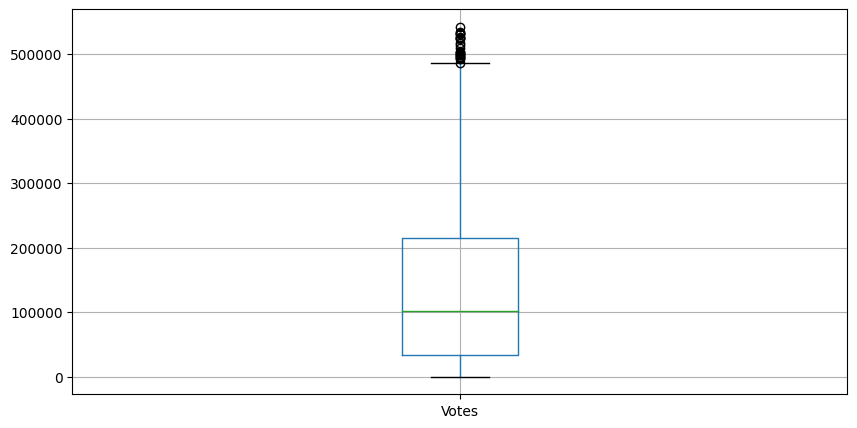

In [57]:
data[outlier].boxplot(figsize = (10,5))
plt.show()

We can still spot some outliers here, but not many. Why? Because after removing outliers, the statistics values of the dataset will change. In this case we are using interquartile (IQR), which means we are using median values. The median values will change a little and not much affected by the removed outliers. That's why the new range, in other words, upper bound and lower bound will slightly change.

Now that we get rid of outliers, let's handle missing values. Let's have a look again at the number of missing values! Based on previous analysis, we have missing values in ***Revenue (Millions)*** and ***Metascore***

To fill missing values in numerical variables, we will make use of the ***SimpleImputer*** function in ***Scikit*** learn library. We will replace missing values with the median value of that feature.

In [58]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy="median")
imputer_num.fit(data[numerical])

SimpleImputer(strategy='median')

In [59]:
data[numerical] = imputer_num.transform(data[numerical])

In [60]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

# Now that there is no missing values in our dataset, let's move on to **feature selection** task and answer questions which will give insight to make informed decision.

# 7. Title of the movie having Runtime >= 180 minutes

In [61]:
data[data['Runtime (Minutes)']>=180]['Title']

88     The Hateful Eight
311       La vie d'Adèle
828           Grindhouse
965        Inland Empire
Name: Title, dtype: object

# 8. In Which year there was the highest average voting?

In [63]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2007.0    229873.294118
2006.0    220226.525000
2012.0    218089.771930
2011.0    212983.379310
2008.0    207381.382979
2009.0    201299.565217
2010.0    200051.945455
2013.0    198600.712644
2014.0    180763.829787
2015.0    103602.282258
2016.0     46634.979730
Name: Votes, dtype: float64

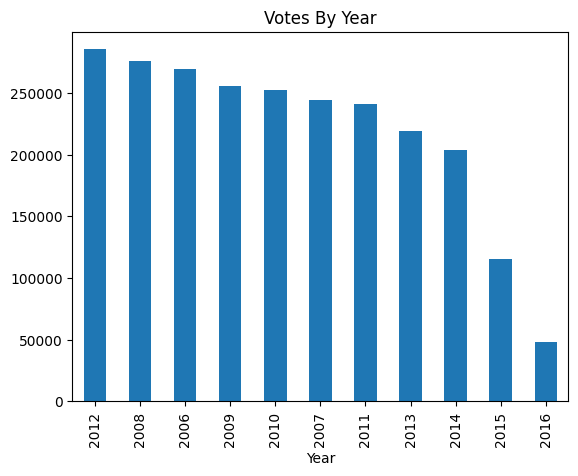

In [22]:
data.groupby('Year')['Votes'].mean().sort_values(ascending=False).plot.bar()
plt.title('Votes By Year')
plt.show()

# 9. In Which Year There Was The Highest Average Revenue

In [25]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)


Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

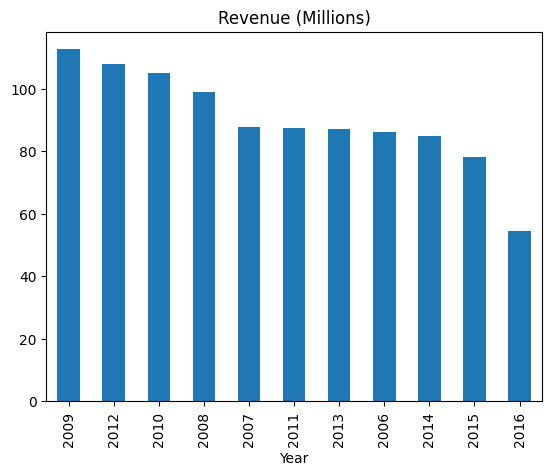

In [23]:
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).plot.bar()
plt.title('Revenue (Millions)')
plt.show()

# 10. Find The Average Rating For Each Director

In [27]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

# 11. Display Top 10 Lengthy Movies Title and Runtime

In [30]:
top10_len = data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]\
.set_index('Title')

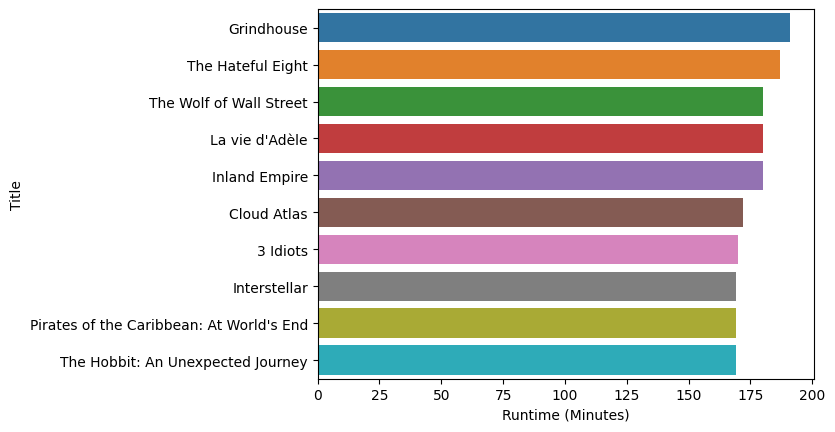

In [43]:
sns.barplot(x='Runtime (Minutes)', y=top10_len.index, data=top10_len)
plt.show()

# 12. Display Number of Movies Per Year

In [33]:
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

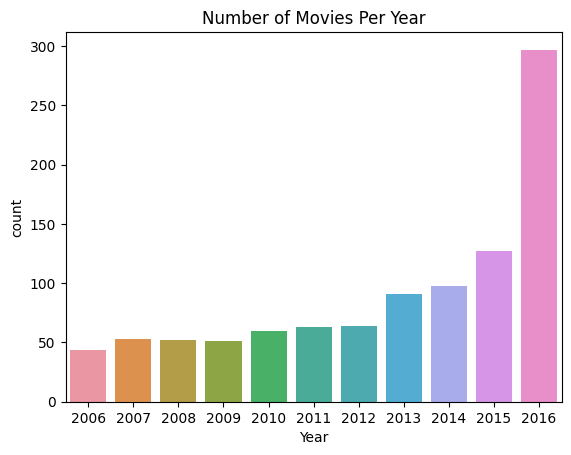

In [35]:
sns.countplot(x='Year', data=data)
plt.title("Number of Movies Per Year")
plt.show()

# 13. Find The Most Popular Movie Title (Highest Revenue)

In [37]:
data[data['Revenue (Millions)'].max()==data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 14. Display Top 10 Highest Rated Movie Titles And Its Directors

In [41]:
top10_rate = data.nlargest(10,'Rating')[['Title','Rating','Director']]\
.set_index('Title')

In [42]:
top10_rate

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


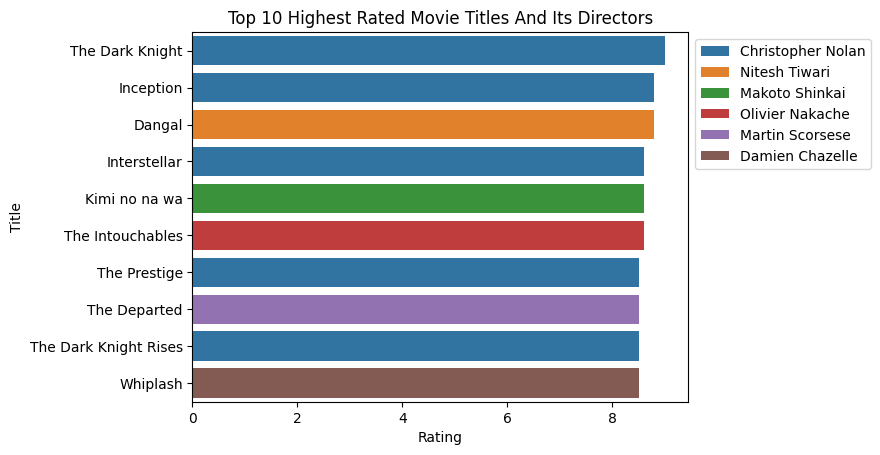

In [58]:
sns.barplot(x='Rating', y=top10_rate.index, data=top10_rate, hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title('Top 10 Highest Rated Movie Titles And Its Directors')
plt.show()

# 15. Display Top 10 Highest Revenue Movie Titles

In [57]:
top10_ren=data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].\
set_index('Title')
top10_ren

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


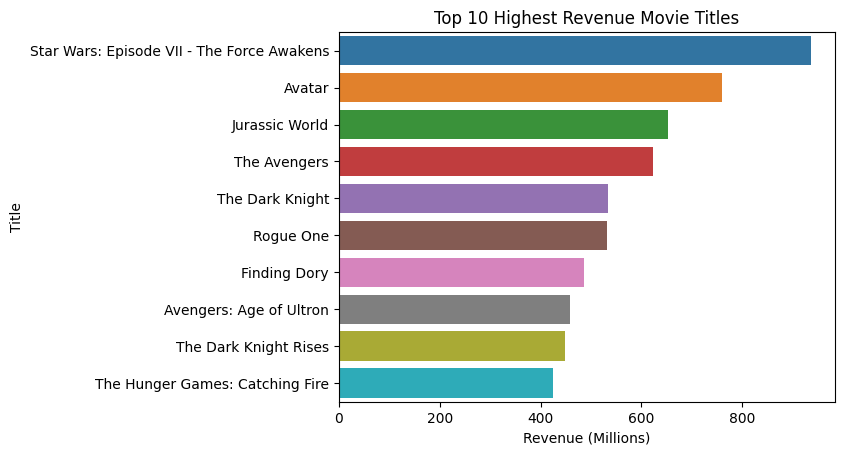

In [61]:
sns.barplot(x='Revenue (Millions)', y=top10_ren.index, data=top10_ren)
plt.title('Top 10 Highest Revenue Movie Titles')
plt.show()

# 16. Find Average Rating of Movies Year Wise


In [63]:
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2016    6.436700
2015    6.602362
2008    6.784615
2013    6.812088
2010    6.826667
2014    6.837755
2011    6.838095
2012    6.925000
2009    6.960784
2006    7.125000
2007    7.133962
Name: Rating, dtype: float64

# 17. Does Rating Affect The Revenue?


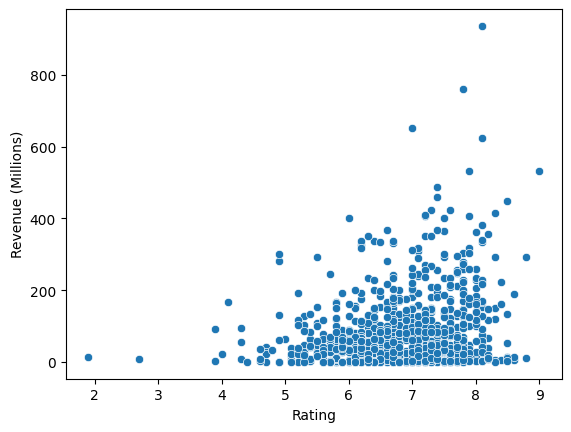

In [65]:
sns.scatterplot(x="Rating", y="Revenue (Millions)", data=data)
plt.show()

yes rating affects revenue

# 18. Classify Movies Based on Ratings [Excellent, Good, and Average]

In [71]:
def rating(rating):
    if rating >=7.0:
        return "Excellent"
    elif rating >=6.0:
        return "Good"
    else:
        return "Average"

In [72]:
data['rating_cat']=data['Rating'].apply(rating)
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


# 19. Count Number of Action Movies


In [73]:
data['Genre'].dtype

dtype('O')

In [76]:
len(data[data['Genre'].str.contains('Action', case=False)])

303

# 20. Find Unique Values From Genre


In [77]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [78]:
list1=[]
for value in data['Genre']:
  list1.append(value.split(','))


In [81]:
one_d=[]
for item in list1:
  for item1 in item:
    one_d.append(item1)

In [83]:
uni_list=[]
for item in one_d:
  if item not in uni_list:
    uni_list.append(item)

In [84]:
len(uni_list)

20

# 21. How Many Films of Each Genre Were Made?


In [ ]:
one_d=[]
for item in list1:
  for item1 in item:
    one_d.append(item1)

In [85]:
from collections import Counter
Counter(one_d)

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})

# CONCLUSION

---



Based on the list of data analytics questions for the IMDB movie dataset, the uniqueness of this project could stem from the following aspects:

Comprehensive Data Analysis: This project appears to cover a wide range of data analysis tasks, including data exploration, data cleaning, descriptive statistics, data aggregation, and data visualization. This comprehensive approach allows for a holistic analysis of the IMDB movie dataset, providing a thorough understanding of the data and its various aspects.

Deep Dive into Movie Attributes: This project involves examining various attributes of movies, such as title, runtime, revenue, rating, genre, director, and voting, among others. This multifaceted analysis allows for a detailed investigation of different movie characteristics, enabling insights into different dimensions of the movie industry and audience preferences.

Data Cleaning and Pre-processing: This project includes steps to check for missing values and identify outlier data . This demonstrates a meticulous approach to data cleaning and pre-processing, which is crucial for obtaining accurate and reliable analysis results.

Time-based Analysis: This project involves analyzing movies on a yearly basis, such as finding the highest average voting and revenue by year, as well as counting the number of movies per year. This time-based analysis provides insights into how movie-related metrics have evolved over time, revealing trends, patterns, and changes in the industry.

Genre Analysis: This project includes examining movie genres, such as finding unique genre values, counting the number of films per genre, and classifying movies based on genre. This genre-based analysis adds a unique dimension to your project, allowing for insights into popular genres, genre trends, and genre-specific characteristics of movies.

Rating and Revenue Relationship: This project involves investigating the relationship between movie ratings and revenue, as well as finding the average rating for each director. This analysis provides insights into whether ratings affect revenue and sheds light on the interplay between critical acclaim and commercial success in the movie industry.

Presentation of Results: This project may involve presenting the analysis results in a visually appealing and informative manner, such as displaying top 10 movies, creating visualizations, and summarizing statistics. This approach enhances the interpretability and usability of your project, making it more engaging and accessible to stakeholders.